In [3]:
# Importing required libraries
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline


In [5]:
file_path = r'C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\events.csv'
data = pd.read_csv(file_path)


In [6]:
# Check the shape of the dataset (rows, columns)
print("Shape of the dataset:", data.shape)

# Get summary information about the dataset
data.info()

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Display a summary of numerical columns
data.describe()


Shape of the dataset: (885129, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB
Missing Values:
 event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64


,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.554165e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


In [7]:
data['event_time'] = pd.to_datetime(data['event_time'])


In [8]:
data = data.drop_duplicates()


In [9]:
print(data.dtypes)


event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object


In [10]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


C:\Users\HP\AppData\Local\Temp\ipykernel_6832\3149403368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')


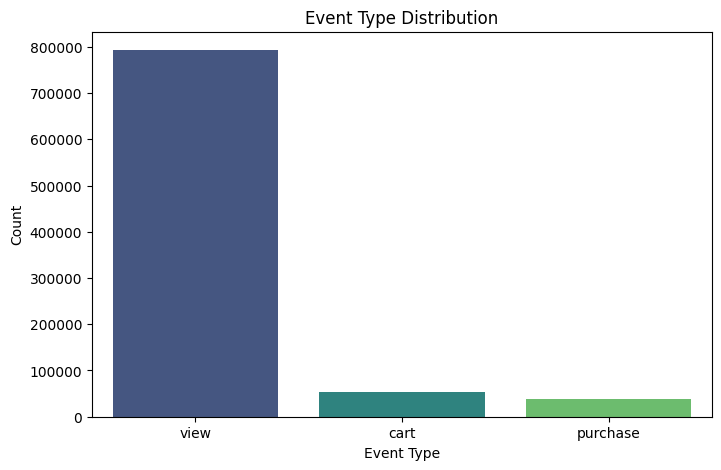

In [11]:
# Count the number of each event type
event_counts = data['event_type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

In [12]:
unique_users = data['user_id'].nunique()
unique_sessions = data['user_session'].nunique()
print(f"Number of unique users: {unique_users}")
print(f"Number of unique sessions: {unique_sessions}")


Number of unique users: 407283
Number of unique sessions: 490398


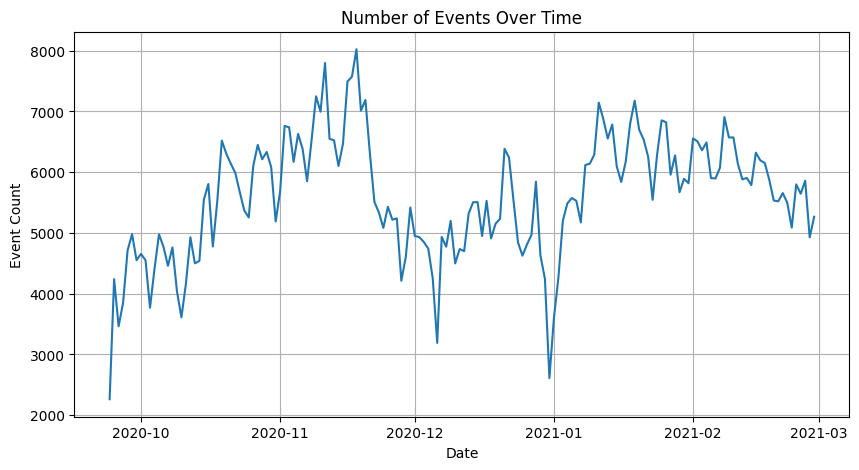

In [14]:
# Resample events by day
data['event_date'] = data['event_time'].dt.date
daily_events = data.groupby('event_date').size()

# Plot
plt.figure(figsize=(10, 5))  # Ensure parentheses are closed
daily_events.plot()
plt.title('Number of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.grid()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6832\2885792041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')


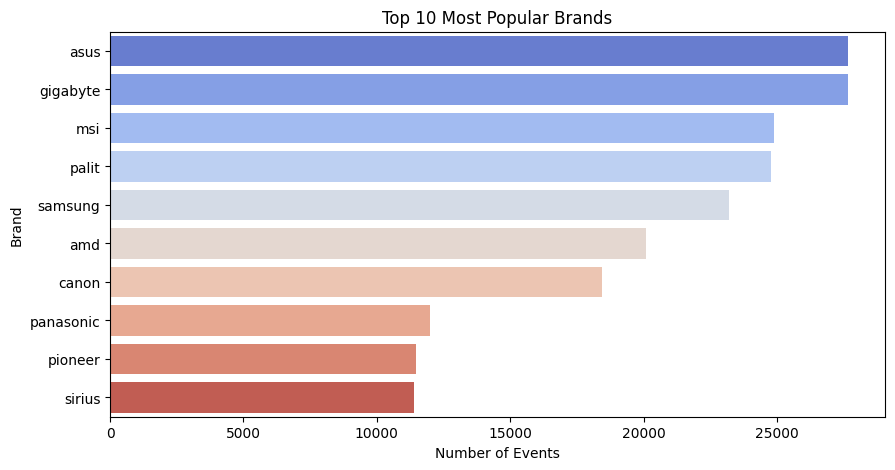

In [15]:
top_brands = data['brand'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')
plt.title('Top 10 Most Popular Brands')
plt.xlabel('Number of Events')
plt.ylabel('Brand')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6832\4293932808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')


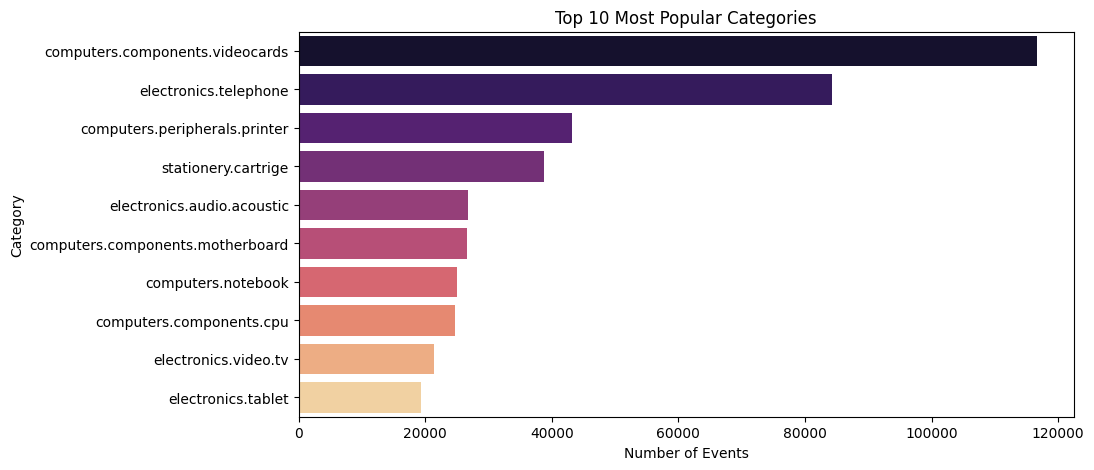

In [16]:
top_categories = data['category_code'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Number of Events')
plt.ylabel('Category')
plt.show()

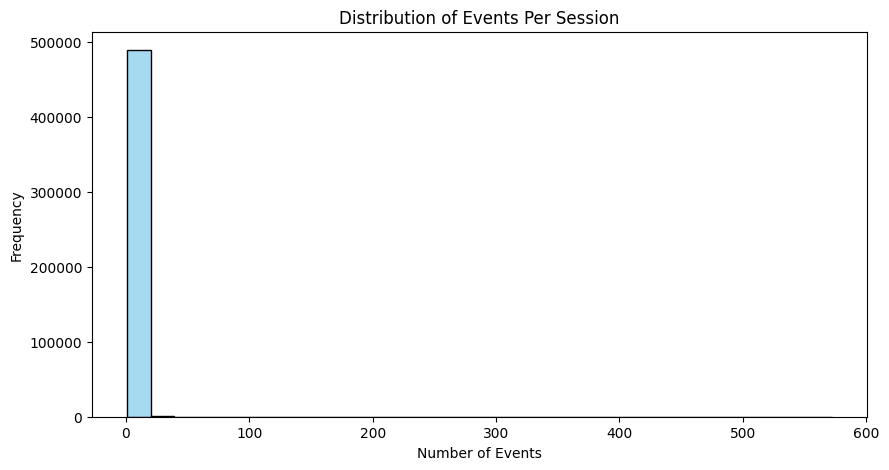

In [17]:
session_counts = data.groupby('user_session').size()
plt.figure(figsize=(10, 5))
sns.histplot(session_counts, bins=30, kde=False, color='skyblue')
plt.title('Distribution of Events Per Session')
plt.xlabel('Number of Events')
plt.ylabel('Frequency')
plt.show()

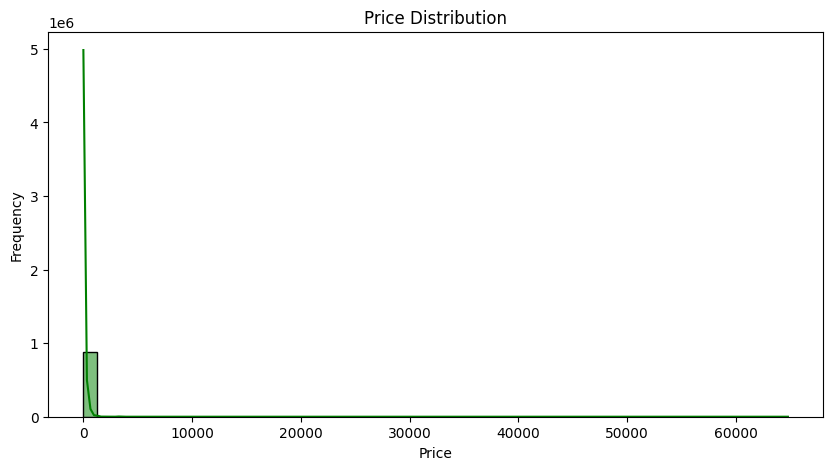

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data['price'], bins=50, kde=True, color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

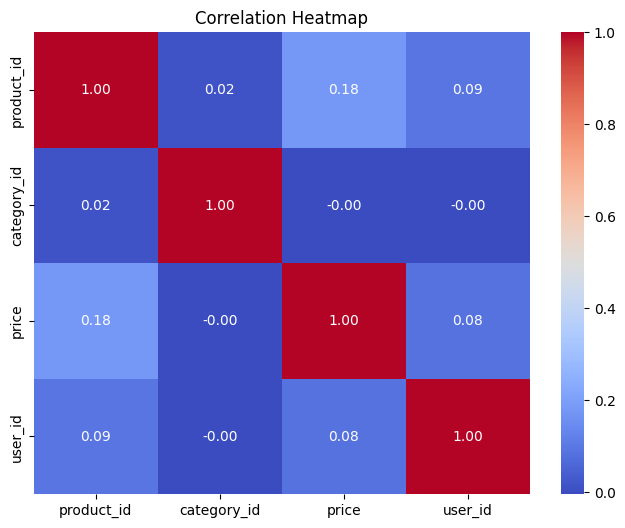

In [20]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# Define the threshold for churn (e.g., 30 days)
from datetime import timedelta

churn_threshold = timedelta(days=30)

# Get the last event time for each user
last_event_time = data.groupby('user_id')['event_time'].max()

# Current dataset's last event date
last_date = data['event_time'].max()

# Mark users as churned if they haven't interacted in the last 30 days
churn_status = (last_date - last_event_time) > churn_threshold

# Add churn status back to the dataset
data['churned'] = data['user_id'].map(churn_status)

# Display churned users count
print("Churned users:", churn_status.sum())
print("Non-churned users:", (~churn_status).sum())

Churned users: 327809
Non-churned users: 79474


In [22]:
# Recency: Days since the user's last event
user_last_event = data.groupby('user_id')['event_time'].max()
recency = (last_date - user_last_event).dt.days

# Frequency: Number of events per user
frequency = data.groupby('user_id').size()

# Monetary: Total spending by the user
monetary = data[data['event_type'] == 'purchase'].groupby('user_id')['price'].sum()

# Combine into a single DataFrame
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})
rfm = rfm.fillna(0)  # Fill NaN values with 0
rfm.head()

,recency,frequency,monetary
user_id,,,
1515915625353226922,122,1,0.0
1515915625353230067,145,1,0.0
1515915625353230683,78,13,0.0
1515915625353230922,149,1,0.0
1515915625353234047,10,36,0.0


In [23]:
# View-to-cart ratio
user_events = data.pivot_table(index='user_id', columns='event_type', aggfunc='size', fill_value=0)
user_events['view_to_cart_ratio'] = user_events['cart'] / user_events['view']

# Cart-to-purchase ratio
user_events['cart_to_purchase_ratio'] = user_events['purchase'] / user_events['cart']

# Merge with RFM data
user_features = rfm.merge(user_events, left_index=True, right_index=True, how='left')
user_features = user_features.fillna(0)  # Handle divisions by zero
user_features.head()

,recency,frequency,monetary,cart,purchase,view,view_to_cart_ratio,cart_to_purchase_ratio
user_id,,,,,,,,
1515915625353226922,122,1,0.0,0,0,1,0.0,0.0
1515915625353230067,145,1,0.0,0,0,1,0.0,0.0
1515915625353230683,78,13,0.0,0,0,13,0.0,0.0
1515915625353230922,149,1,0.0,0,0,1,0.0,0.0
1515915625353234047,10,36,0.0,0,0,36,0.0,0.0


In [24]:
# Add churn status as the target variable
user_features['churned'] = churn_status.astype(int)
user_features.head()

,recency,frequency,monetary,cart,purchase,view,view_to_cart_ratio,cart_to_purchase_ratio,churned
user_id,,,,,,,,,
1515915625353226922,122,1,0.0,0,0,1,0.0,0.0,1
1515915625353230067,145,1,0.0,0,0,1,0.0,0.0,1
1515915625353230683,78,13,0.0,0,0,13,0.0,0.0,1
1515915625353230922,149,1,0.0,0,0,1,0.0,0.0,1
1515915625353234047,10,36,0.0,0,0,36,0.0,0.0,0


In [25]:
# Save to CSV for easy reloading
user_features.to_csv('user_features.csv', index=True)

In [26]:
# Load the user features dataset
data = pd.read_csv('user_features.csv', index_col=0)

# Separate features (X) and target (y)
X = data.drop('churned', axis=1)  # Drop the target column
y = data['churned']              # Target column (churn status)

# Check the data
print(X.head())
print(y.head())

                     recency  frequency  monetary  cart  purchase  view  \
user_id                                                                   
1515915625353226922      122          1       0.0     0         0     1   
1515915625353230067      145          1       0.0     0         0     1   
1515915625353230683       78         13       0.0     0         0    13   
1515915625353230922      149          1       0.0     0         0     1   
1515915625353234047       10         36       0.0     0         0    36   

                     view_to_cart_ratio  cart_to_purchase_ratio  
user_id                                                          
1515915625353226922                 0.0                     0.0  
1515915625353230067                 0.0                     0.0  
1515915625353230683                 0.0                     0.0  
1515915625353230922                 0.0                     0.0  
1515915625353234047                 0.0                     0.0  
user_id
1515

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (325826, 8)
Testing set size: (81457, 8)


In [31]:
# Check for missing values
print("Missing values in each column:\n", X.isnull().sum())

# Check for infinite values
print("Any infinite values in the dataset:", np.isinf(X).values.any())

# Check for very large values
print("Maximum value in the dataset:", X.max().max())

Missing values in each column:
 recency                   0
frequency                 0
monetary                  0
cart                      0
purchase                  0
view                      0
view_to_cart_ratio        0
cart_to_purchase_ratio    0
dtype: int64
Any infinite values in the dataset: True
Maximum value in the dataset: inf


In [32]:
# Fill missing values with the mean or a constant (e.g., 0)
X = X.fillna(0)

In [33]:
# Replace infinite values with a large finite number
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

In [34]:
# Ensure no missing or infinite values remain
print("Any NaN values left:", X.isnull().values.any())
print("Any infinite values left:", np.isinf(X).values.any())

Any NaN values left: False
Any infinite values left: False


In [36]:
# Check again for missing, infinite, or very large values
print("Any NaN values in X:", X.isnull().values.any())
print("Any infinite values in X:", np.isinf(X).values.any())
print("Maximum value in X:", X.max().max())

Any NaN values in X: False
Any infinite values in X: False
Maximum value in X: 12080.83


In [41]:
# Clip all feature values to a maximum of 10,000
X = X.clip(lower=0, upper=10000)

In [43]:
# Check for NaN and infinite values in the training set
print("NaN values in X_train:", X_train.isnull().values.any())
print("Infinite values in X_train:", np.isinf(X_train).values.any())

# Check the range of values
print("Maximum value in X_train:", X_train.max().max())
print("Minimum value in X_train:", X_train.min().min())

NaN values in X_train: False
Infinite values in X_train: True
Maximum value in X_train: inf
Minimum value in X_train: 0.0


In [44]:
# Convert all columns to float
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)


In [45]:
# Clip values in the training and test sets
X_train = X_train.clip(lower=0, upper=10000)
X_test = X_test.clip(lower=0, upper=10000)


In [46]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [47]:
print("Columns in X_train:\n", X_train.dtypes)


Columns in X_train:
 recency                   float32
frequency                 float32
monetary                  float32
cart                      float32
purchase                  float32
view                      float32
view_to_cart_ratio        float32
cart_to_purchase_ratio    float32
dtype: object


In [48]:
invalid_rows = X_train[~np.isfinite(X_train).all(axis=1)]
print("Invalid rows in X_train:\n", invalid_rows)


Invalid rows in X_train:
 Empty DataFrame
Columns: [recency, frequency, monetary, cart, purchase, view, view_to_cart_ratio, cart_to_purchase_ratio]
Index: []


In [49]:
# Drop problematic rows
X_train = X_train[np.isfinite(X_train).all(axis=1)]


In [50]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15910
           1       1.00      1.00      1.00     65547

    accuracy                           1.00     81457
   macro avg       1.00      1.00      1.00     81457
weighted avg       1.00      1.00      1.00     81457



C:\Users\HP\AppData\Local\Temp\ipykernel_6832\2876867349.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


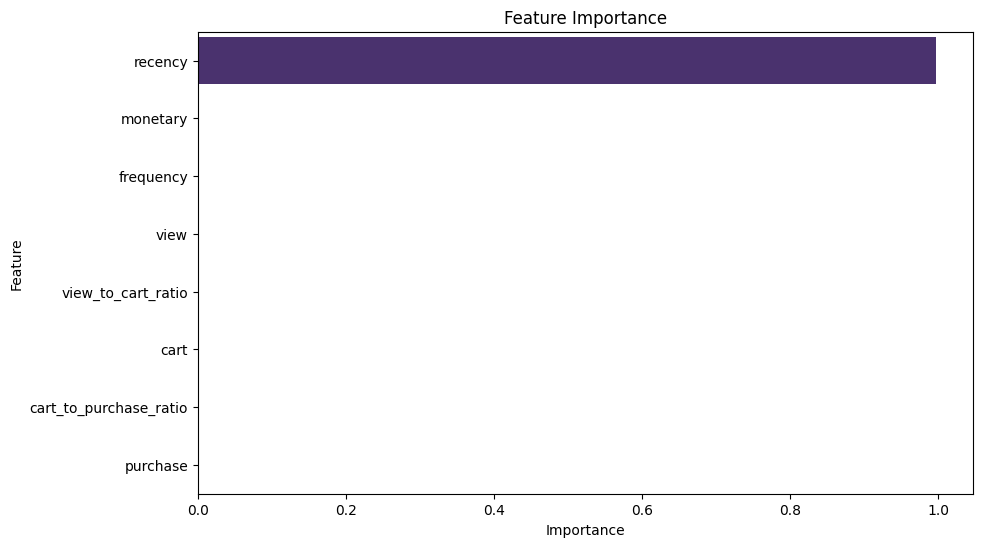

In [51]:
# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [52]:
import joblib

# Save the model
joblib.dump(rf_model, 'churn_prediction_model.pkl')
print("Model saved successfully!")


Model saved successfully!


C:\Users\HP\AppData\Local\Temp\ipykernel_6832\3025949070.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


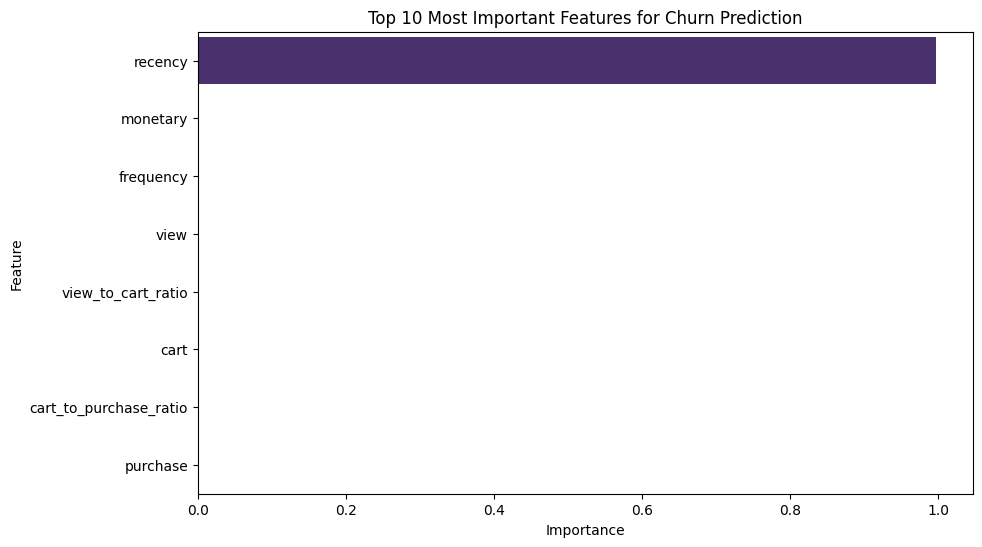

In [53]:
# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
